<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 9
## Scott Spurlock
### 3/10/2021


In [ ]:
# Imports
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
from random import randint

In [ ]:
rng = np.random.RandomState(0)
x = 20 * np.random.rand(500, 1)
y = 0.003*x**3 + 0.01*x**2 + 0.9*x*np.sin(x) + 1.1 * np.random.randn(500, 1)

for i in range(30):
  idx = int(random()*y.shape[0])
  if random() > 0.5:
    y[idx] += 20 * random()
  else:
    y[idx] -= 5 * random()

is_train = np.ones_like(y)
df_train = pd.DataFrame(np.hstack((x, y, is_train)), columns=['x', 'y', 'is_train'])
df_train = df_train.sort_values(by='x').reset_index(drop=True)

x = 20 * np.random.rand(100, 1)
y = 0.003*x**3 + 0.01*x**2 + 0.9*x*np.sin(x)
is_train = np.zeros_like(y)
df_test = pd.DataFrame(np.hstack((x, y, is_train)), columns=['x', 'y', 'is_train'])
df_test = df_test.sort_values(by='x').reset_index(drop=True)

df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

df.to_csv('regression_data.csv', index=False)
df


,x,y,is_train
0,0.065818,1.617208,1.0
1,0.070090,0.746412,1.0
2,0.161115,1.703172,1.0
3,0.176634,0.784650,1.0
4,0.252513,-0.309209,1.0
...,...,...,...
595,18.752661,21.667648,0.0
596,19.092991,28.667949,0.0
597,19.484743,36.393775,0.0
598,19.500304,36.679917,0.0


In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1XHF2E7uXPqXSmGi2X1E9_o9VmIh89bfV')
df

,x,y,is_train
0,0.000799,1.699337,1.0
1,0.010214,-0.436091,1.0
2,0.071439,-1.873174,1.0
3,0.076680,15.854541,1.0
4,0.115109,-0.831285,1.0
...,...,...,...
595,19.120931,29.241459,0.0
596,19.188589,30.621332,0.0
597,19.705345,40.229150,0.0
598,19.787308,41.515614,0.0


In [ ]:
# Separate out train and test data
xtrain = df['x'][df['is_train'] == 1].values.reshape((-1, 1))
ytrain = df['y'][df['is_train'] == 1].values.reshape((-1, 1))
xtest = df['x'][df['is_train'] == 0].values.reshape((-1, 1))
ytest = df['y'][df['is_train'] == 0].values.reshape((-1, 1))


In [ ]:
ytrain.shape

(500, 1)

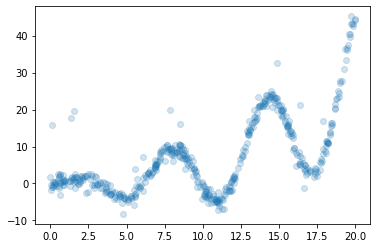

In [ ]:
# plot regression training data
plt.scatter(xtrain, ytrain, alpha=0.2);


Model slope:     [1.15783494]
Model intercept: [-4.35375211]


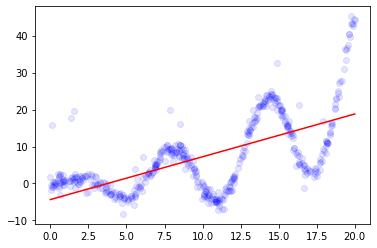

In [ ]:
model = LinearRegression()

model.fit(xtrain, ytrain)

xfit = np.arange(xtrain.min(), xtrain.max()+0.1, 0.1).reshape((-1, 1))
yfit = model.predict(xfit)

plt.scatter(xtrain, ytrain, c='blue', alpha=0.1)
plt.plot(xfit, yfit, 'r')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



degree = np.arange(1, 21)
mae_vals = []

for i in range(len(degree)):

  poly_model = make_pipeline(PolynomialFeatures(degree[i]),
                            LinearRegression())

  poly_model.fit(xtrain, ytrain)
  ypred = poly_model.predict(xtest)

  mae = mean_absolute_error(ytest, ypred)
  mae_vals.append(mae)
  print('Degree: {:02d}, MAE: {:.4f}'.format(degree[i], mae))



Degree: 01, MAE: 6.2029
Degree: 02, MAE: 5.7396
Degree: 03, MAE: 5.7474
Degree: 04, MAE: 5.5844
Degree: 05, MAE: 5.0749
Degree: 06, MAE: 4.5953
Degree: 07, MAE: 4.4224
Degree: 08, MAE: 4.0010
Degree: 09, MAE: 1.8886
Degree: 10, MAE: 1.8722
Degree: 11, MAE: 0.5027
Degree: 12, MAE: 0.6474
Degree: 13, MAE: 0.9709
Degree: 14, MAE: 0.4930
Degree: 15, MAE: 1.6709
Degree: 16, MAE: 1.2162
Degree: 17, MAE: 1.3363
Degree: 18, MAE: 1.7428
Degree: 19, MAE: 2.1488
Degree: 20, MAE: 2.3771


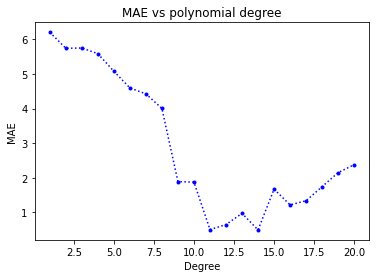

In [ ]:
plt.plot(degree, mae_vals, ':b.')
plt.title('MAE vs polynomial degree')
plt.xlabel('Degree')
plt.ylabel('MAE');

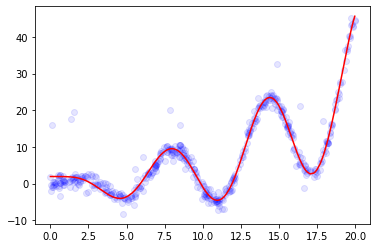

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(14),
                          LinearRegression())

poly_model.fit(xtrain, ytrain)
ypred = poly_model.predict(xtrain)

plt.scatter(xtrain, ytrain, c='blue', alpha=0.1)
plt.plot(xtrain, ypred, 'r');
